In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/CuerposCelestes.dat"
file=pd.read_csv(url,delimiter=" ",header=None)
posiciones=[list(row) for row in file.values]

In [ ]:
e1=[1,0,0]
e2=[0,1,0]
e3=[0,0,1]

E=np.add((np.add(np.tensordot(e1,e1,axes=0),np.tensordot(e2,e2,axes=0))),np.tensordot(e3,e3,axes=0))
n=len(posiciones)

I=np.zeros([3,3])

for k in range (0,n):
  r_k=posiciones[k]
  M1=np.dot(np.tensordot(r_k,r_k,axes=1),E)
  M2=-1*np.tensordot(r_k,r_k,axes=0)
  I_k=np.add(M1,M2)
  I=np.add(I,I_k)

In [ ]:
print(I)

[[ 1.11638178e+04  2.05248547e+00  7.42865762e-01]
 [ 2.05248547e+00  8.95207032e+03 -2.34834623e+03]
 [ 7.42865762e-01 -2.34834623e+03  4.23411270e+03]]


In [ ]:
def EigValue(A,c=0,itmax=1000,tolerancia=1e-18):
    
    n = A.shape[0]
    v0 = np.zeros(n)
    
    v0[c] = 1.
    lambda0 = np.inf  
    for k in range(itmax):
        
        v1 = np.dot(A,v0)
        lambda1 = v1[c]/v0[c]
        
        v1 = v1/np.linalg.norm(v1) 
        if np.abs(lambda0 - lambda1) <= tolerancia:
            break

        lambda0 = lambda1
        v0 = v1
                 
    return lambda0,v0

def Tensor(v):
    
    n = v.shape[0]
    T = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            T[i,j] = v[i]*v[j]
    
    return T

def GetEigValues(A):
    
    A1 = A.copy()
    
    values = np.zeros(A1.shape[0])
    vectors = np.zeros_like(A1)
    
    for i in range(A.shape[0]):
        
        l,v = EigValue(A1,i) 
        
        values[i] = l
        vectors[:,i] = v
      
        B = A1 - l*Tensor(v)
        
        A1 = B
        
    return values,vectors
Eigenvalues=GetEigValues(I)[0]
Eigenvectors=GetEigValues(I)[1]
print("Valores propios: ")
print(','.join(map(str, Eigenvalues))) 
print("Vectores propios: ")
print(','.join(map(str, Eigenvectors))) 

Valores propios: 
11163.820205045582,9921.679357918718,3264.5012835647026
Vectores propios: 
[ 9.99999139e-01 -1.29907113e-03 -1.86085626e-04],[0.00127176 0.92431024 0.38163983],[-3.23776433e-04 -3.81639736e-01  9.24311099e-01]


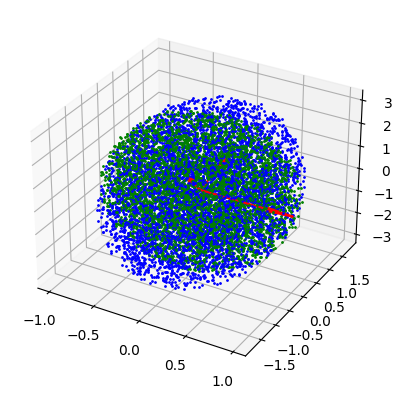

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for posicion in posiciones:
  ax.scatter(posicion[0],posicion[1],posicion[2],color="blue",s=1)
  posicion1=np.matmul(posicion,Eigenvectors)
  ax.scatter(posicion1[0],posicion1[1],posicion1[2],color="green",s=1)
for vector in Eigenvectors:
  ax.quiver(0,0,0,vector[0],vector[1],vector[2],color="red")

In [ ]:
A=np.array([[1,1,1],[1,1,1],[1,1,1]])
B=np.array([[1,1,1]])
np.matmul(posiciones[0],Eigenvectors)

array([0.29321961, 0.17122734, 0.54302738])